## Robust Regression 
 Due to outlier best fit line is not fit and normaly distributed

 we can use robust regression to remove outliers and get best mean.

## Random Sample Consensus (RANSAC) Agorithm

In [5]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston

In [6]:
ds1  = load_boston()
ds1_df = pd.DataFrame(ds1.data, columns=ds1.feature_names)
ds1_df['MEDV'] = ds1.target
ds1_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [15]:
X = ds1_df[['RM']]
y = ds1_df['MEDV']

In [16]:
from sklearn.linear_model import RANSACRegressor

In [17]:
ransac = RANSACRegressor().fit(X, y)

In [18]:
# inliner data points
inliner_mask = ransac.inlier_mask_
# outliner data points
outliner_mask = np.logical_not(inliner_mask)

In [20]:
# for plot
np.arange(3,10,1)

array([3, 4, 5, 6, 7, 8, 9])

In [21]:
line_X = np.arange(3,10,1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])

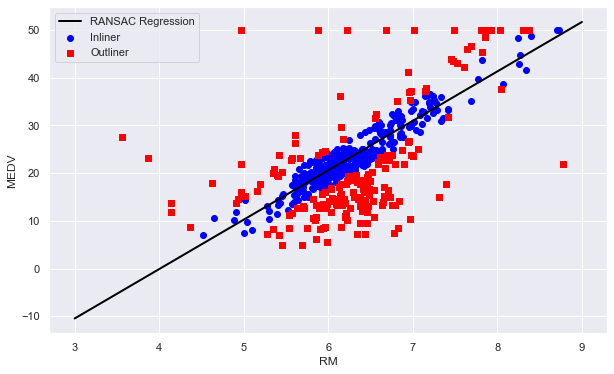

In [25]:
sns.set(style='darkgrid', context='notebook')
plt.figure(figsize=(10,6))
plt.scatter(X[inliner_mask], y[inliner_mask], c='blue', marker='o', label='Inliner')
plt.scatter(X[outliner_mask], y[outliner_mask], c='red', marker='s', label='Outliner')
plt.plot(line_X, line_y_ransac, color='black', linewidth=2, label='RANSAC Regression')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.legend(loc='upper left')
plt.show()


# Evaluate the model

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
ds1_df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [29]:
# X = ds1_df[['RM']]
# y = ds1_df['MEDV']
X = ds1_df.drop('MEDV', axis=1)
y = ds1_df['MEDV']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [37]:
lr = LinearRegression().fit(X_train, y_train)

In [39]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

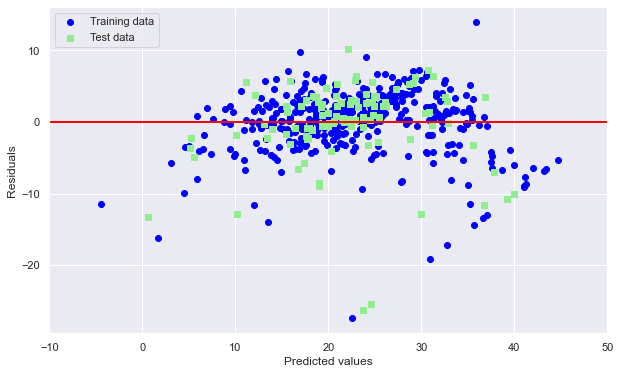

In [40]:
# Method : 1  (Residual Analysis)

plt.figure(figsize=(10,6))
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.show()


In [41]:
#  Method : 2  (Mean Squared Error)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_test_pred)

33.448979997676524

In [42]:
mean_squared_error(y_train, y_train_pred)

19.326470203585725

In [43]:
# Method : 3 (Coef of determination)
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.589222384918251

In [44]:
r2_score(y_train, y_train_pred)

0.7730135569264234

In [45]:
from sklearn.metrics import classification_report,confusion_matrix